## Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы


1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

1.2 Изучите стоимости недвижимости

1.3 Изучите распределение квадратуры жилой

1.4 Изучите распределение года постройки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./kc-house-data.csv', encoding='1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


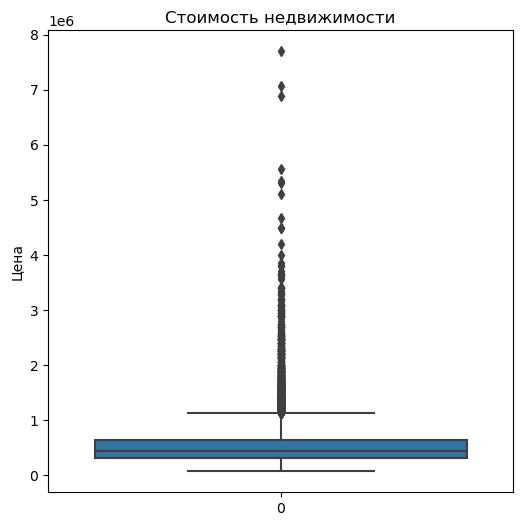

In [6]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df['price'])
plt.title('Стоимость недвижимости')
plt.ylabel('Цена');

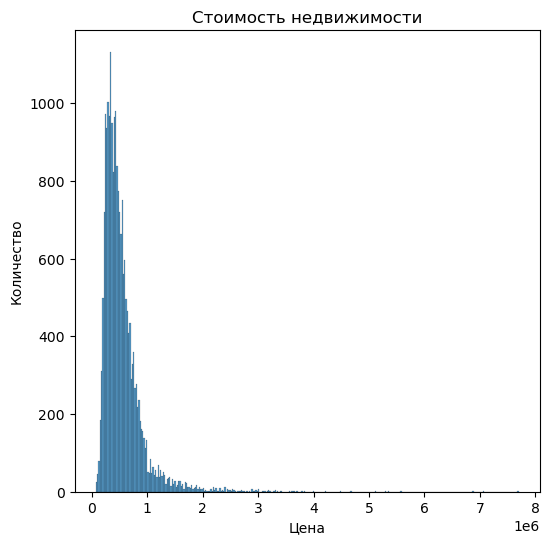

In [7]:
plt.figure(figsize=(6,6))
sns.histplot(data=df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

Из данных графиков очевидно, что стоимость большнства домов находится в интервале от 200_000 тыс до 1 млн, но также есть цена домов более 1-2 млн (выбросы)

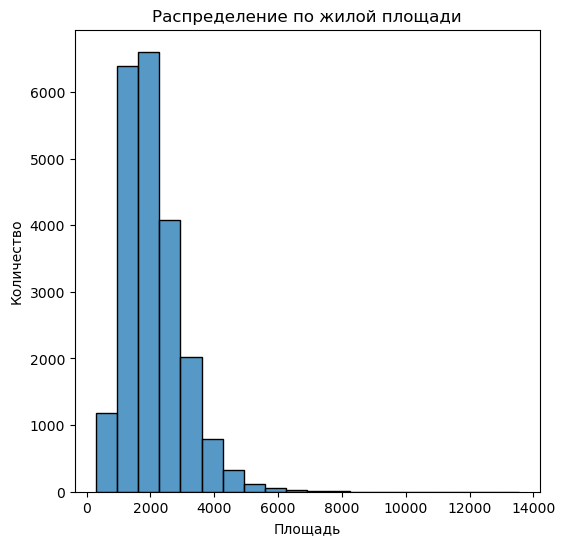

In [8]:
plt.figure(figsize=(6,6))
sns.histplot(data=df['sqft_living'], bins=20)
plt.title('Распределение по жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество');

Основная часть домов имеет жилую площадь около 2000

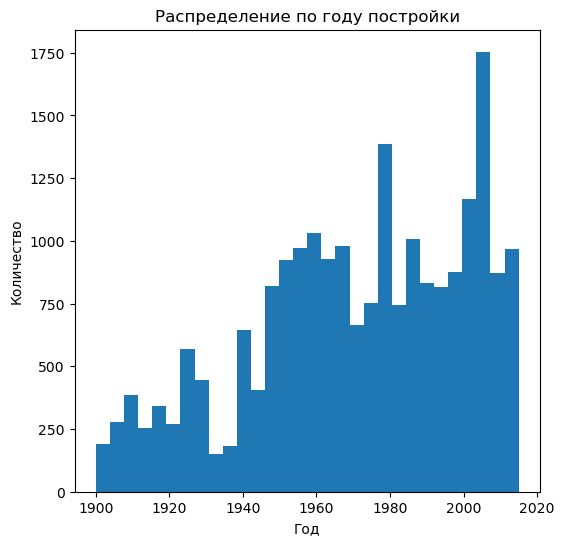

In [17]:
plt.figure(figsize=(6,6))
plt.hist(df['yr_built'], bins=30)
plt.title('Распределение по году постройки')
plt.xlabel('Год')
plt.ylabel('Количество');

##  Задача 2

2.1 Изучите распределение домов от наличия вида на набережную

Постройте график
Сделайте выводы

2.2 Изучите распределение этажей домов

2.2 Изучите распределение состояния домов

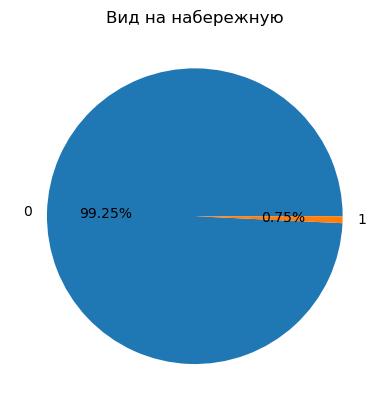

In [10]:
data=df['waterfront'].value_counts()
plt.pie(data, autopct = '%.2f%%', labels = data.index)
plt.title('Вид на набережную');

Вид на набережную имеют только 0,75% домов

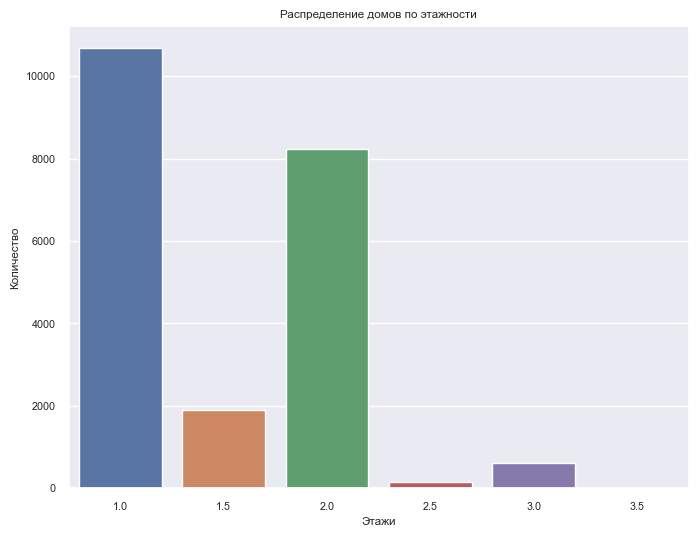

In [118]:
data_1=df['floors'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x = data_1.index, y = data_1.values)
plt.title('Распределение домов по этажности')
plt.xlabel('Этажи')
plt.ylabel('Количество');

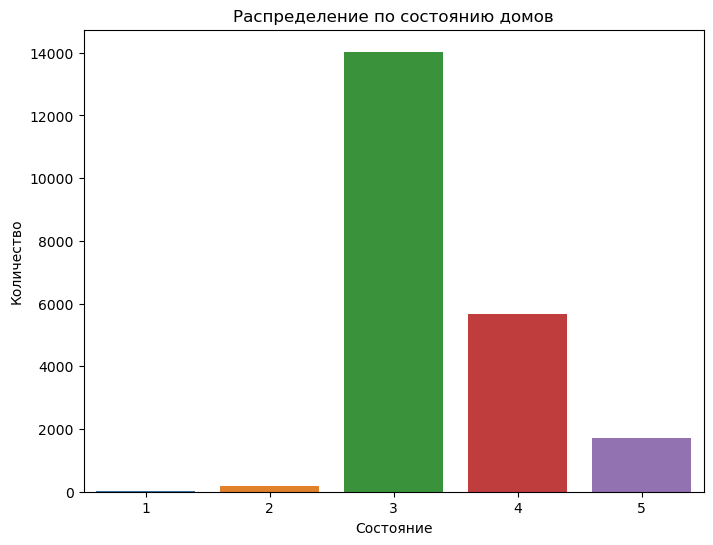

In [12]:
data_2=df['condition'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x = data_2.index, y = data_2.values)
plt.title('Распределение по состоянию домов')
plt.xlabel('Состояние')
plt.ylabel('Количество');

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### Решение
Для того, чтобы определить какие характеристики оказывают на стоимость домов наибольшее влияние посмотрим матрицу корреляции. 

In [54]:
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix = np.round(corr_matrix,1)
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.0,0.0,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.0,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.0,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.0,0.0,0.5,0.4,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
waterfront,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


<b>Для наглядности построим тепловую карту</b>:

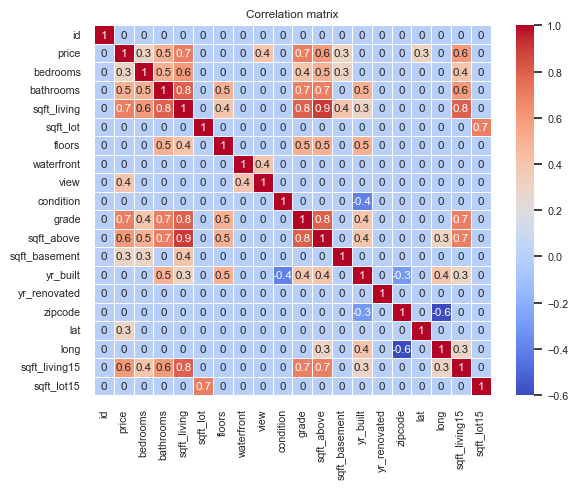

In [55]:
sns.set(font_scale=0.7)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

На тепловой карте очевидна линейная взамосвязь цены от следующих параметров (коэффициент корреляции >= 0,3): количество спален (bedrooms), жилая площадь (sqft_living), оценка вида (view), оценка конструкции и дизайна (grade), средний размер внутренней жилой площади для ближайших 15 домов (sqft_living15), количество ванных комнат (bathroom), широта (lat).
Такие характеристики, как sqft_above и sqft_basement являются составными частями жилой площади, поэтому их более детально рассматривать не будем. 

<b>Расмотрим более подробно следующие параметры: жилая площадь (sqft_living), конструкция и дизайн (grade), вид (view), количество ванных комнат (bathrooms), количество спален (bedrooms) и средний размер внутренней жилой площади для ближайших 15 домов (sqft_living15)</b>.

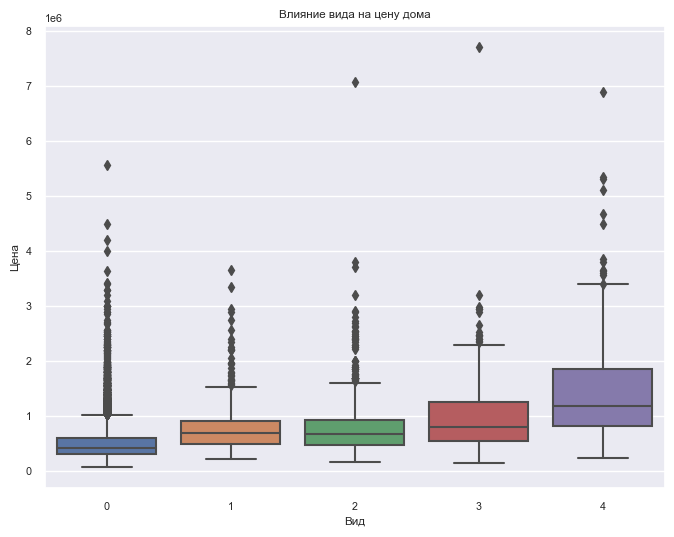

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['view'], y=df['price'])
plt.title('Влияние вида на цену дома')
plt.xlabel('Вид')
plt.ylabel('Цена');

Стоимость домов увеличивается с улучшением вида. Максимальную стоимость имеют дома с оценкой вида 5, но при оценке вида 1-2 стоимость меняется не так очевидно. В данном случае, также просматривается, что с оценкой дома 0 много выбросов. Максимальная стоимость дома имеет оценку вида 4.

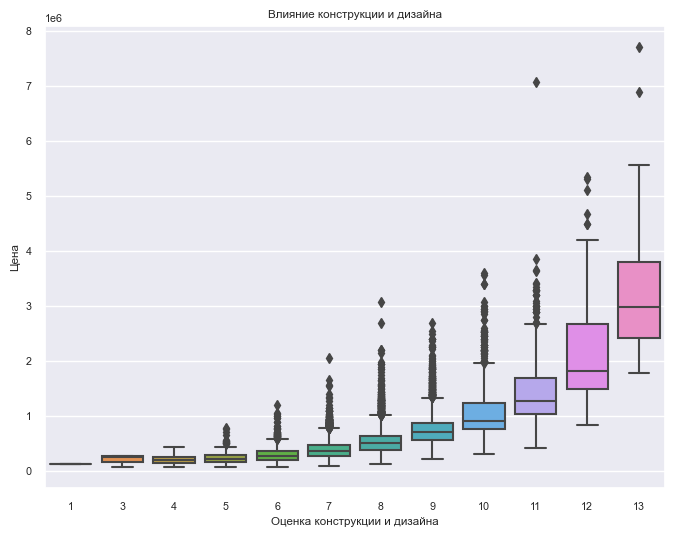

In [119]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['grade'], y=df['price'])
plt.title('Влияние конструкции и дизайна')
plt.xlabel('Оценка конструкции и дизайна')
plt.ylabel('Цена');

Из графика очевидно, что при оценке конструкции и дизайна дома выше 6 стоимость домов увеличивается более стремительно. Чем выше оценка, тем выше стоимость, самые дороги дома имеют оценку 13.

<b>Расмотрим влияние значения жилой площади и среднего размера внутренней жилой площади для ближайших 15 домов на стоимость домов.</b>

			Влияние жилой площади


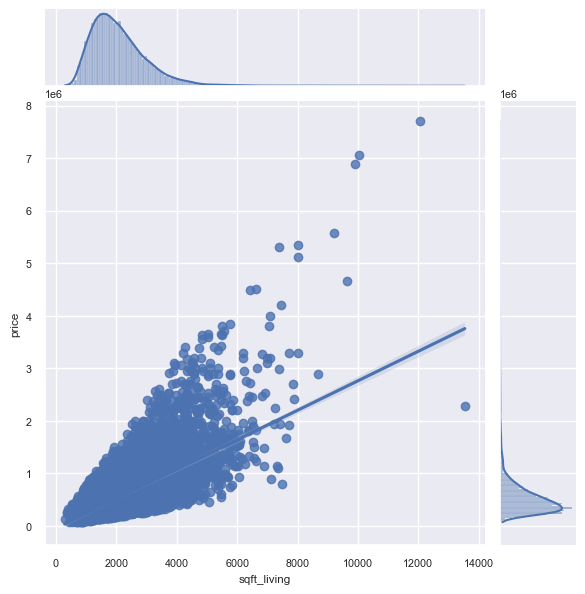

In [76]:
print("\t\t\tВлияние жилой площади")
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

Из графика можно сделать вывод: стоимость домов имеют прямую линейную зависимость от значения жилой площади.

		Влияние жилой площади ближайших 15 домов


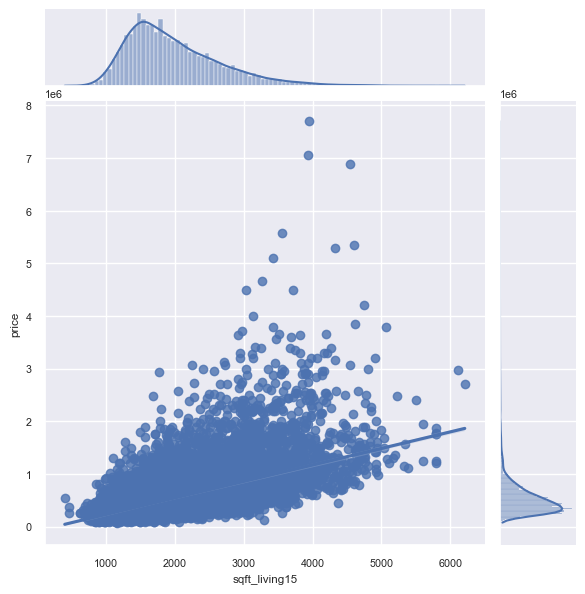

In [120]:
print('\t\tВлияние жилой площади ближайших 15 домов')
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='reg');

Наблюдаем схожую зависимость с примером выше.

<b>Рассмотрим зависмость от количества спален</b>

Касательно дома с 33 спальнями (жилая площадь 1620) – учитывая цену, можно предположить что это опечатка и спален на самом деле 3. 

In [107]:
df[df['bedrooms']==33]['sqft_living']

15870    1620
Name: sqft_living, dtype: int64

In [108]:
df[df['bedrooms']==33]['price']

15870    640000.0
Name: price, dtype: float64

In [109]:
df[(df['bedrooms']==3) & (df['sqft_living'] >= 1620)]['price'] 

1        538000.0
4        510000.0
6        257500.0
8        229500.0
9        323000.0
           ...   
21580    594866.0
21581    625000.0
21585    270000.0
21589    347500.0
21603    507250.0
Name: price, Length: 5413, dtype: float64

In [94]:
print(df['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Цена: 15870    640000.0
Name: price, dtype: float64


##### Заменим 33 спальни на 3. 

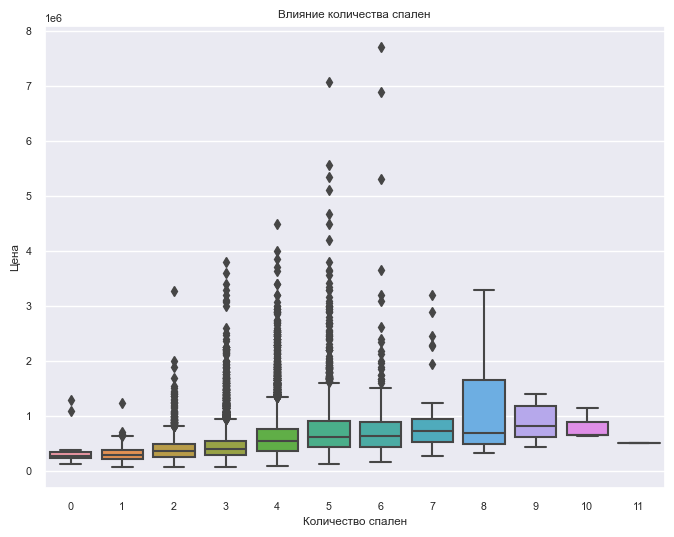

In [111]:
df.loc[df['bedrooms']==33,['bedrooms']]=3 
plt.figure(figsize=(8,6))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title('Влияние количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена');

В данном случае цена дома увеличивается с увелечением спален, но достаточно плавно, с увеличением количества спален более 9 цена снижается, также цена дома с 8 спальнями ниже, чем с 7 и 9 спальнями.

<b>Рассмотрим зависмость цены от количества ванных комнат</b>

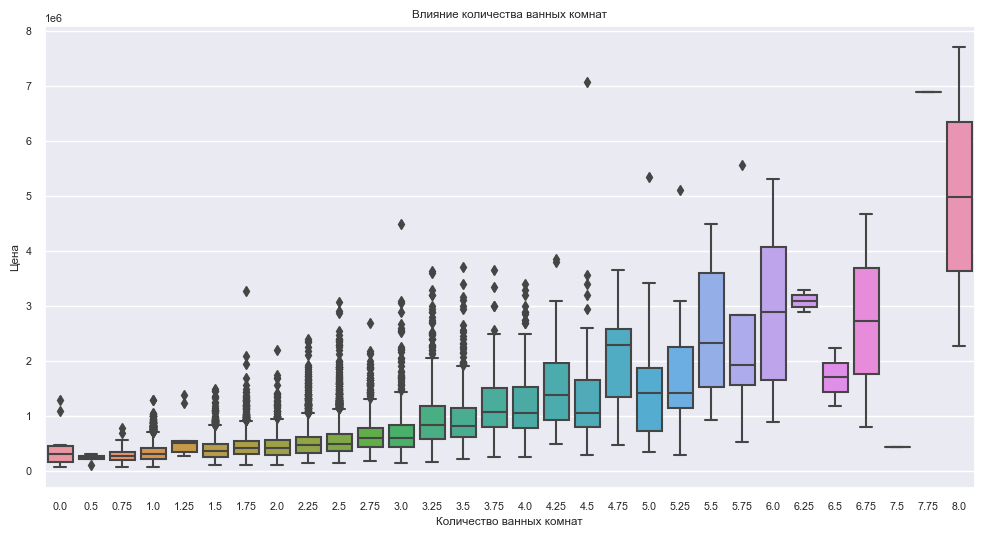

In [121]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.title('Влияние количества ванных комнат')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Цена');

С увелечением количества ванных комнат в целом наблюдается рост стоимости, но в тоже время наблюдается хаотичность на интервале, где количество варьируется от 4,25 до 6,75 и стремительный рост цены домов с 8 ванными комнатами.